In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv',parse_dates=['Date'])

df['Total Cases'] =  df[['Confirmed','Recovered','Deaths']].sum(axis=1)


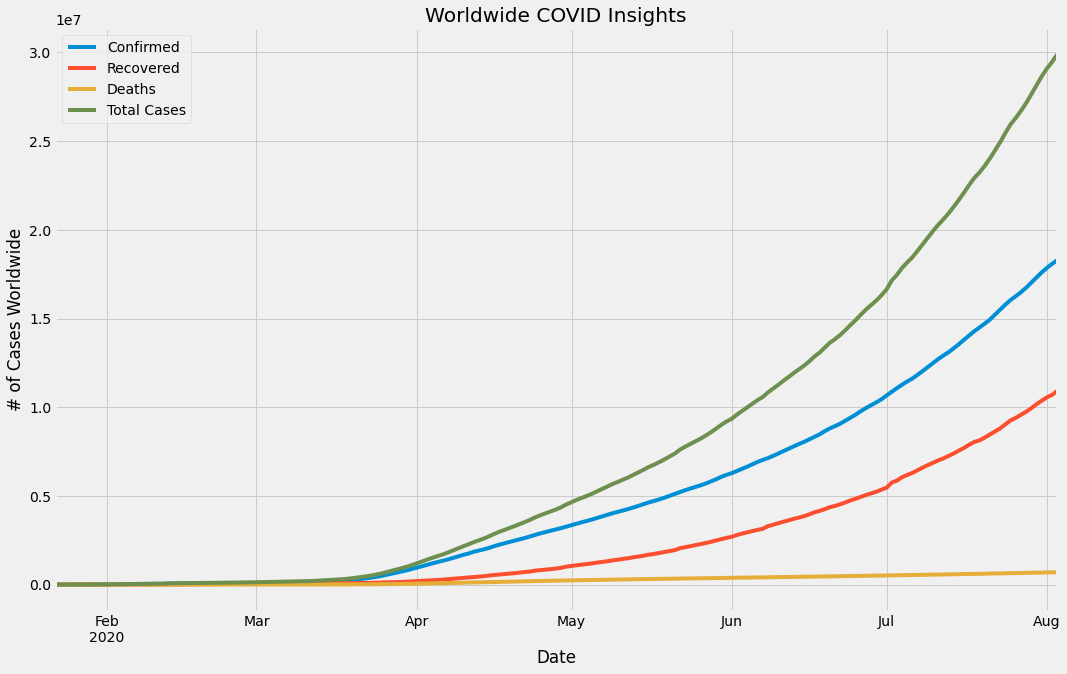

In [2]:
# WorldWide cases
worldwide_df = df.groupby(['Date']).sum()
w = worldwide_df.plot(figsize=(16,10))
w.set_xlabel("Date")
w.set_ylabel("# of Cases Worldwide")
w.title.set_text("Worldwide COVID Insights")
plt.show()

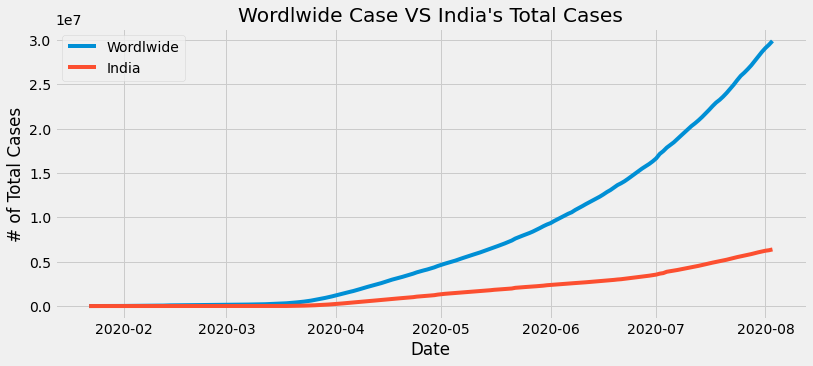

In [5]:
in_df = df[df['Country']=='US'].groupby(["Date"]).sum()

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

ax.plot(worldwide_df[["Total Cases"]],label = "Wordlwide")
ax.plot(in_df[["Total Cases"]], label= "India")
ax.set_xlabel("Date")
ax.set_ylabel("# of Total Cases")
ax.title.set_text("Wordlwide Case VS India's Total Cases")

plt.legend(loc='upper left')

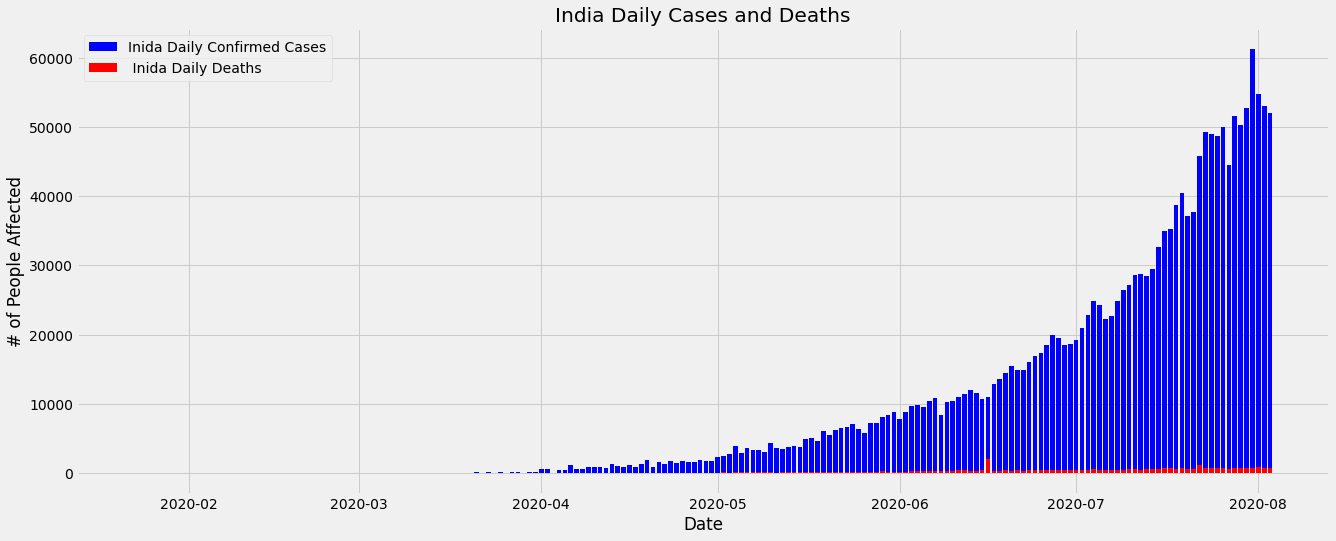

In [4]:
# India Daily Cases and Deaths 

in_df = in_df.reset_index()
in_df['Daily Confirmed'] = in_df['Confirmed'].sub(in_df['Confirmed'].shift())
in_df['Daily Deaths'] = in_df['Deaths'].sub(in_df['Deaths'].shift())

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

ax.bar(in_df['Date'],in_df['Daily Confirmed'], color='b', label='Inida Daily Confirmed Cases')
ax.bar(in_df['Date'],in_df['Daily Deaths'], color='r', label=' Inida Daily Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('# of People Affected')
ax.title.set_text('India Daily Cases and Deaths')

plt.legend(loc='upper left')
plt.show()

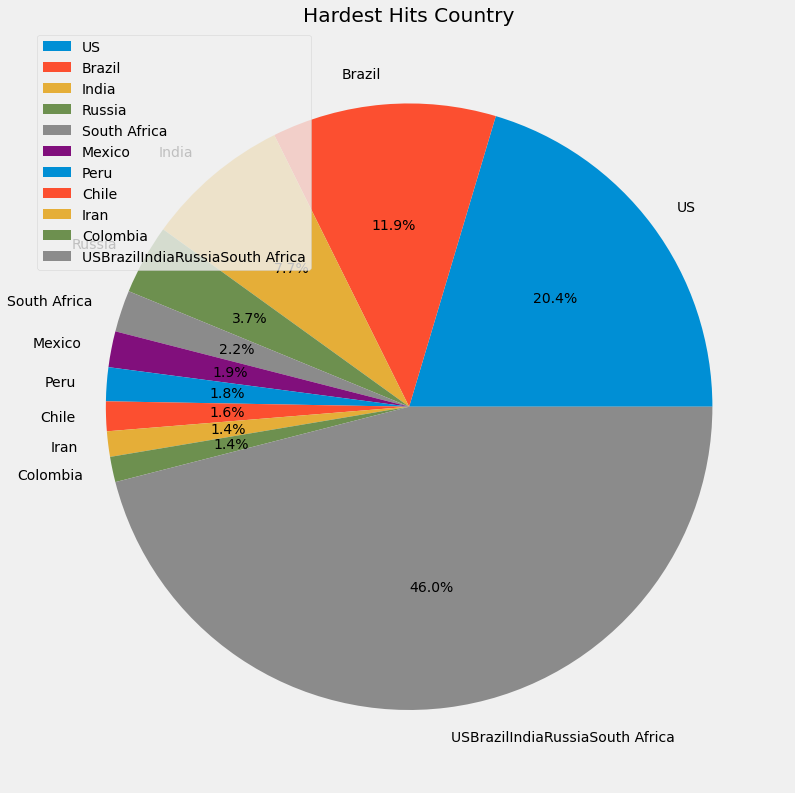

In [91]:
from datetime import date, timedelta
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%Y-%m-%d')
yesterday = '2020-08-01'

today_df = df[df['Date'] == yesterday]
top_10 = today_df.sort_values(['Confirmed'], ascending=False)[:10]

top_10.loc['rest-of-world'] = today_df.sort_values(['Confirmed'], ascending=False)[:5].sum()
top_10.loc['rest-of-world','Counrtry'] = "Rest of World"


fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111)

ax.pie(top_10['Confirmed'],labels = top_10['Country'],autopct='%1.1f%%')
ax.title.set_text('Hardest Hits Country')

plt.legend(loc='upper left')
plt.show()